# Case Study on Testing of Hypothesis


In [20]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import math

In [3]:
#read data
df=pd.read_csv("Sales_add.csv")
df.head()

,Month,Region,Manager,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
0,Month-1,Region - A,Manager - A,132921,270390
1,Month-2,Region - A,Manager - C,149559,223334
2,Month-3,Region - B,Manager - A,146278,244243
3,Month-4,Region - B,Manager - B,152167,231808
4,Month-5,Region - C,Manager - B,159525,258402


In [5]:
#Checking for null values
df.isnull().sum().sum()

0

In [9]:
# Checking the Data Types of features
df.dtypes

Month                             object
Region                            object
Manager                           object
Sales_before_digital_add(in $)     int64
Sales_After_digital_add(in $)      int64
dtype: object

In [64]:
df.describe()

,Sales_before_digital_add(in $),Sales_After_digital_add(in $),$Total_Sales
count,22.000000,22.000000,22.000000
mean,149239.954545,231123.727273,380363.681818
std,14844.042921,25556.777061,27164.928093
min,130263.000000,187305.000000,335691.000000
25%,138087.750000,214960.750000,361961.250000
50%,147444.000000,229986.500000,374526.500000
75%,157627.500000,250909.000000,396667.750000
max,178939.000000,276279.000000,455218.000000


# 1.The company wishes to clarify whether there is any increase in sales after stepping into digital marketing.

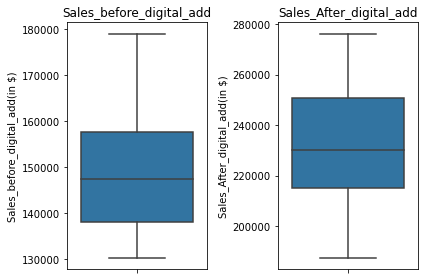

In [79]:
plt.subplot(1,2,1)
sns.boxplot(data=df,y="Sales_before_digital_add(in $)")
plt.title("Sales_before_digital_add")
plt.subplot(1,2,2)
sns.boxplot(data=df,y="Sales_After_digital_add(in $)")
plt.title("Sales_After_digital_add")
plt.tight_layout()

No outlier Present

In [36]:
# H0=digital marketing has no impact on sales
# Ha=There is an increase in sales after stepping into digital marketing

level_of_Significance=0.05
print("Level_of_Significance:",str(level_of_Significance))

print("We will go for T-test, since it is one direction")

Level_of_Significance: 0.05
We will go for T-test, since it is one direction


In [42]:
Sample_b=df["Sales_before_digital_add(in $)"].to_numpy()
Sample_a=df["Sales_After_digital_add(in $)"].to_numpy()

In [43]:
# importing library
from scipy.stats import ttest_ind

In [44]:
#computing ttest
_,p=ttest_ind(Sample_b,Sample_a)

In [45]:
# Comparing the p value with level of significance
if p>level_of_Significance:
    print("Failing to reject null Hypothesis")
else:
    print("Rejecting null Hypothesis")

Rejecting null Hypothesis


In [46]:
#Conclusion:
    # Based on the testing carried out in the provided data, we are rejecting the null hypothesis
    # We can conclude that There is an increase in sales after stepping into digital marketing

# 2. The company needs to check whether there is any dependency between the features “Region” and “Manager”.

In [49]:
# H0=There is no dependency between the features “Region” and “Manager”
# Ha=There is a dependency between the features “Region” and “Manager”

print("level_of_Significance=",str(level_of_Significance))

level_of_Significance= 0.05


In [81]:
data_Crosstab=pd.crosstab(index=df['Region'], columns=df['Manager'])
data_Crosstab

Manager,Manager - A,Manager - B,Manager - C
Region,,,
Region - A,4,3,3
Region - B,4,1,2
Region - C,1,3,1


In [83]:
# importing library to perform chi-Test
from scipy.stats import chi2_contingency

In [91]:
# To undestand the relationship between 2 Categorical variable, we use Chi-Test
chi2_statistic, p, dof, expctd=chi2_contingency(data_Crosstab)

In [95]:
print(f"chi2 statistic:     {chi2_statistic}")
print(f"p-value:            {p}")
print(f"degrees of freedom: {dof}")
print("expected frequencies:")
print(expctd)

chi2 statistic:     3.050566893424036
p-value:            0.5493991051158094
degrees of freedom: 4
expected frequencies:
[[4.09090909 3.18181818 2.72727273]
 [2.86363636 2.22727273 1.90909091]
 [2.04545455 1.59090909 1.36363636]]


In [96]:
if p>level_of_Significance:
    print("Failing to reject null hypothesis")
else:
    print("Rejecting null hypothesis")

Failing to reject null hypothesis


In [97]:
#Conclusion:
    # Based on the testing carried out in the provided data, we are Failing to reject null hypothesis 
    # We can conclude that There is no significant dependency between the features “Region” and “Manager”